# 制作美观的jupyter notebook

## 1 最终分享格式

jupyter notebook可以直接分享，但是读者需要安装jupyter notbebook才能打开。Github可以把ipynb文件显示成为HTML。

除了直接分享ipynb文件，notebook还可以导出成为多种格式，包括Markdown, reST, LaTex, PDF, HTML。我认为HTML是比较好的选择，因为读者只需要用浏览器就能打开。不推荐导出成为PDF，因为PDF通常要分页，而图文混合排版要在分页后保存美观是不容易的。Markdown, reST和LaTex作为写作格式是很不错的，但是作为最终的阅读格式则不够理想。

## 2 图片

matplotlib中的一个包是pyplot, 主要是提供类似matlab的接口。其实matplotlib里还有很多包是对应于图形元素的，例如figure, legend等等。

### 2.1 单个图片

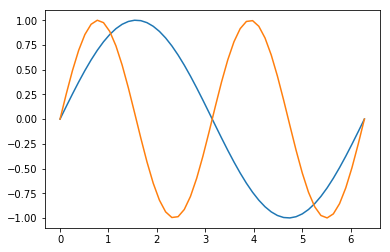

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0, 2 * np.pi, 50)

plt.plot(x, np.sin(x),
        x, np.sin(2 * x))
plt.show()

注意最后一行的`plt.show()`，虽然不加图片也能够显示，但是会出现以下的文字输出，不够美观。

~~~
[<matplotlib.lines.Line2D at 0x1195fba90>,
 <matplotlib.lines.Line2D at 0x1195fbd30>]
 ~~~

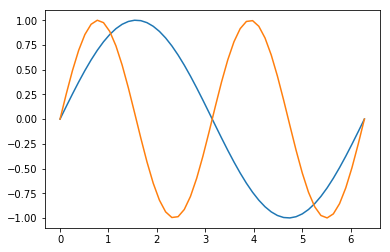

In [45]:
plt.plot(x, np.sin(x),
        x, np.sin(2 * x))

### 2.2 多张图片

多张图片可以使用subplot或者axis。subplot的排列是在一个网格里，整齐，但是限制比较多。axis可以实现比较自由的排版。这里只讨论subplot。

如果图片比较少，可以用下面的方法：

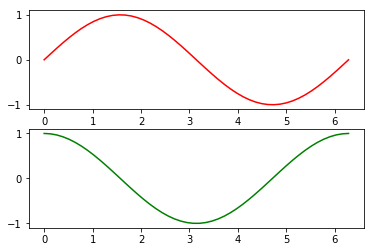

In [46]:
x = np.linspace(0, 2 * np.pi, 50)
plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x), 'r')
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x), 'g')
plt.show()

如果遇到循环，可以用下面的代码：

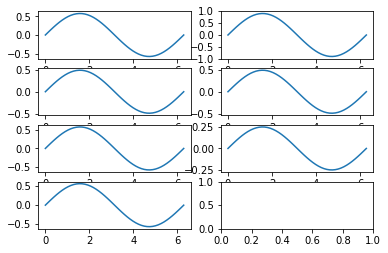

In [47]:
import math

Xs = []
Ys = []
for i in range(0, 7):
    x = np.linspace(0, 2 * np.pi, 50)
    y = np.sin(x) * np.random.random_sample()
    Xs.append(x)
    Ys.append(y)


num_columns = 2
num_rows = math.ceil(len(Xs) / num_columns) 
fig, axes = plt.subplots(num_rows, num_columns)
for i, x in enumerate(Xs):
    axes[np.unravel_index(i, (num_rows, num_columns))].plot(Xs[i], Ys[i])
plt.show()

上面代码会留下一个空的子图，如果用`add_subplot`就可以避免这个问题

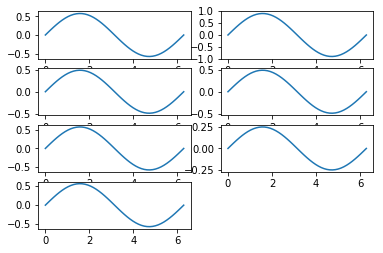

In [48]:
num_columns = 2
num_rows = math.ceil(len(Xs) / num_columns) 
fig = plt.figure()
for i, x in enumerate(Xs):
    ax = fig.add_subplot(num_rows, num_columns, i+1)
    ax.plot(Xs[i], Ys[i])
plt.show()

有多列图片的时候默认的图片宽度可能不够理想，可以通过添加figsize来调整。figsize的单位是inch。但是因为jupyter notebook本身的宽度会随着屏幕宽度而改变，所以最终的显示效果可能会有所改变。推荐10~18 inch作为宽度是比较合适的。高度则取决于行数，图片的高宽比例，需要多次试验才能找到合适的值。

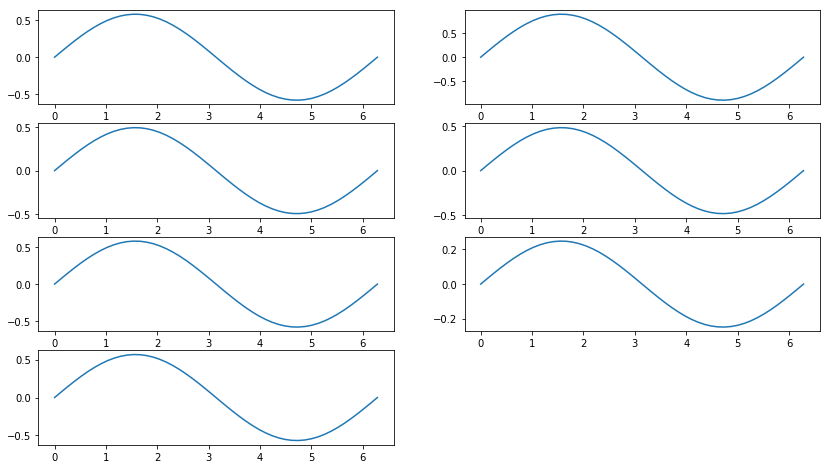

In [49]:
num_columns = 2
num_rows = math.ceil(len(Xs) / num_columns) 
fig = plt.figure(figsize=(14, 8))
for i, x in enumerate(Xs):
    ax = fig.add_subplot(num_rows, num_columns, i+1)
    ax.plot(Xs[i], Ys[i])
plt.show()